In [165]:
import pandas as pd 
import glob
import openpyxl
import os

In [166]:
file = glob.glob("E:/NADINE/JAWABAN/jwb/*.xlsx")
print(file)

['E:/NADINE/JAWABAN/jwb\\jwb_Cemput_wp-pindah-madya-jaktim.xlsx', 'E:/NADINE/JAWABAN/jwb\\jwb_KB3_WP-KELUAR-064-MADYA-JAKTIM.xlsx', 'E:/NADINE/JAWABAN/jwb\\jwb_Madsel1_madya-jaktim.xlsx', 'E:/NADINE/JAWABAN/jwb\\jwb_Madut_Permintaan data Madya Timur.xlsx', 'E:/NADINE/JAWABAN/jwb\\jwb_mensa_Lamp_Permintaan-Data-Masterfile-dan-Penerimaan-Pajak-atas-Wajib-Pajak-Pindah.xlsx', 'E:/NADINE/JAWABAN/jwb\\jwb_Permintaan-Data-Masterfile-dan-Penerimaan-Pajak-atas-Wajib-Pajak-Pindah.xlsx', 'E:/NADINE/JAWABAN/jwb\\jwb_sabersa_Lamp_Permintaan-Data-Masterfile-dan-Penerimaan-Pajak-atas-Wajib-Pajak-Pindah.xlsx', 'E:/NADINE/JAWABAN/jwb\\jwb_Senen_Lampiran-WP-Pindah-Madya-Jakarta-Timur-KIRIM.xlsx', 'E:/NADINE/JAWABAN/jwb\\jwb_serpong_Lamp_Permintaan-Data-Masterfile-dan-Penerimaan-Pajak-atas-Wajib-Pajak-Pindah.xlsx', 'E:/NADINE/JAWABAN/jwb\\jwb_Tebet_Jawaban_ND_1059.xlsx']


In [167]:
data = pd.DataFrame()
for item in file:
    df = pd.read_excel(item, engine='openpyxl', sheet_name='MPN', usecols=['NPWP','NAMA','KDMAP','KDBAYAR','TGLBAYAR','NOMINAL','NTPN'],parse_dates=['TGLBAYAR'])
    data = pd.concat([data,df], ignore_index=True)

In [168]:
data.KDMAP = data.KDMAP.astype(str)
data.KDBAYAR = data.KDBAYAR.astype(str)
data.dtypes

NPWP                object
NAMA                object
KDMAP               object
KDBAYAR             object
TGLBAYAR    datetime64[ns]
NOMINAL            float64
NTPN                object
dtype: object

In [169]:
#data.to_excel('E:/NADINE/JAWABAN/WPMASUK.xlsx')

In [170]:
#cek = pd.read_excel('E:/NADINE/JAWABAN/jwb/jwb_Cemput_wp-pindah-madya-jaktim.xlsx', engine='openpyxl',sheet_name = 'MPN')

In [171]:
import matplotlib.pyplot as plt 
import seaborn as sb 

<AxesSubplot:xlabel='TGLBAYAR'>

<Figure size 3600x720 with 0 Axes>

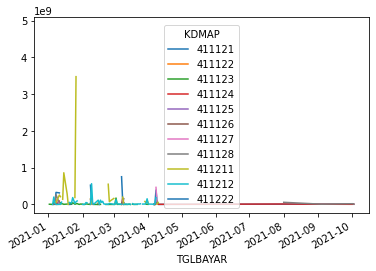

In [177]:
data= data.loc[data.TGLBAYAR>'2020-12-31']
plt.figure(figsize=(50,10))
data.pivot_table(index='TGLBAYAR',columns='KDMAP', values='NOMINAL').plot()


data.set_index('TGLBAYAR',inplace=True)
data.resample('M').sum()